# 11-gdal-testing
> Testing importing our data using the GDAL library

Adapted from [this code](https://opensourceoptions.com/blog/gdal-python-tutorial-reading-and-writing-raster-datasets/). In order to use this notebook, make sure you have created a conda environment and installed the appropriate libraries. View the Feb 20 zoom recording for a walkthrough. Here are useful commands:
- conda env list (to see your different environment, the * indicates which is active)
- conda activate landtrust (to activate your virtual enviornment)
- conda list (to see installed libraries)
- conda install gdal

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'osgeo'

In [32]:
# Replace with the path to your data file. Use the file with the .tif extension
file_2001 = '/Users/liambetts/Vanderbilt/Land Trust/VDS Team Data Share/CONUS2001_ClipAOI.tif'
file_2004 = '/Users/liambetts/Vanderbilt/Land Trust/VDS Team Data Share/CONUS2004_ClipAOI.tif'

In [33]:
# Convert to GDAL dataset
ds_2001 = gdal.Open(file_2001)
ds_2004 = gdal.Open(file_2004)

In [77]:
# Check type
print(type(ds_2001))

<class 'osgeo.gdal.Dataset'>


In [6]:
# With gdal we can access many raster properties.
# Ex: projection, size (columns and rows), the number of bands, and the geotransform (upper left corner, cell width, etc.). 

print("Projection: ", ds_2001.GetProjection())  # get projection
print("Columns:", ds_2001.RasterXSize)  # number of columns
print("Rows:", ds_2001.RasterYSize)  # number of rows
print("Band count:", ds_2001.RasterCount)  # number of bands

Projection:  PROJCS["Albers_Conical_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Columns: 35165
Rows: 17975
Band count: 1


In [8]:
print("GeoTransform", ds_2001.GetGeoTransform())

# The gdal GeoTransform is a tuple that contains six elements.
# Each GeoTransform element is expalined below in order of its pythonic index (0-5).

#[0] left X coordinate
#[1] pixel width
#[2] row rotation (usually zero)
#[3] top Y coordinate
#[4] column rotation (usually zero)
#[5] pixel height, this will be negative for north up images

GeoTransform (364730.7691300305, 29.999746813208393, 0.0, 1737544.4746212494, 0.0, -29.99934164631371)


In [79]:
# With GDAL, raster data is accessed by raster bands. 
# First, we’ll retrieve the raster band. Next we’ll retrieve the band data as a numpy array.

band_2001 = ds_2001.GetRasterBand(1)
band_2004 = ds_2004.GetRasterBand(1)

array_2001 = band_2001.ReadAsArray()
array_2004 = band_2004.ReadAsArray()

array_2001.shape

(17975, 35165)

In [86]:
diff = array_2004 - array_2001

In [87]:
# Our data is too big to visualize all at once.
# Create a subset by changing the indices below.

n1 = 8000
n2 = 11000

subset_2001 = array_2001[n1:n2,n1:n2]
subset_2004 = array_2004[n1:n2,n1:n2]
subset_diff = diff[n1:n2,n1:n2]
subset_2001.shape # 3000 x 3000 seems to work. You can try bigger.

(3000, 3000)

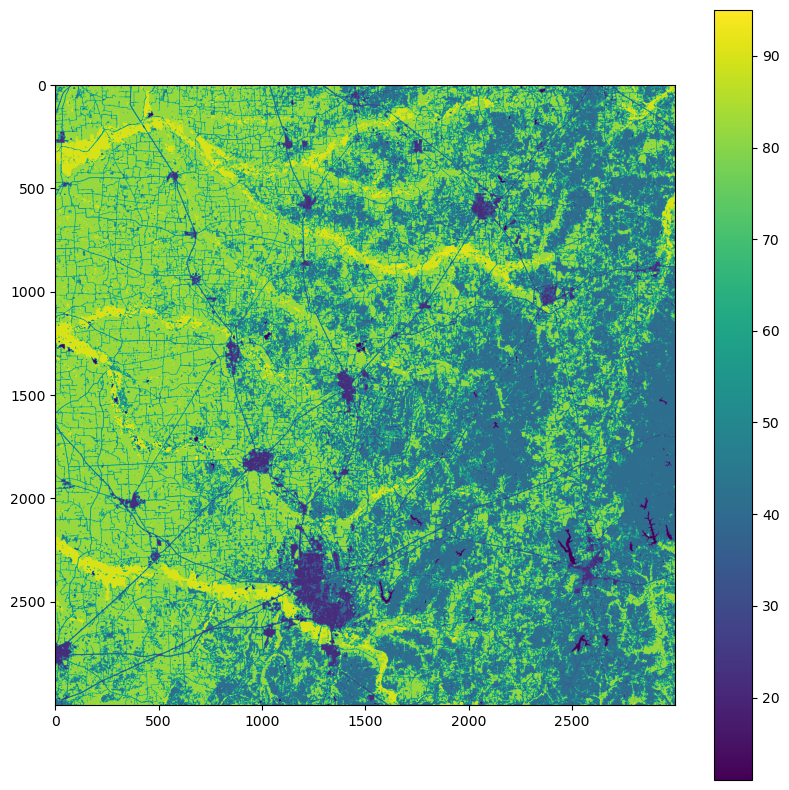

In [61]:
# Display raster band using matplotlib

plt.figure(figsize=(10, 10))
plt.imshow(subset_2001)
plt.colorbar()

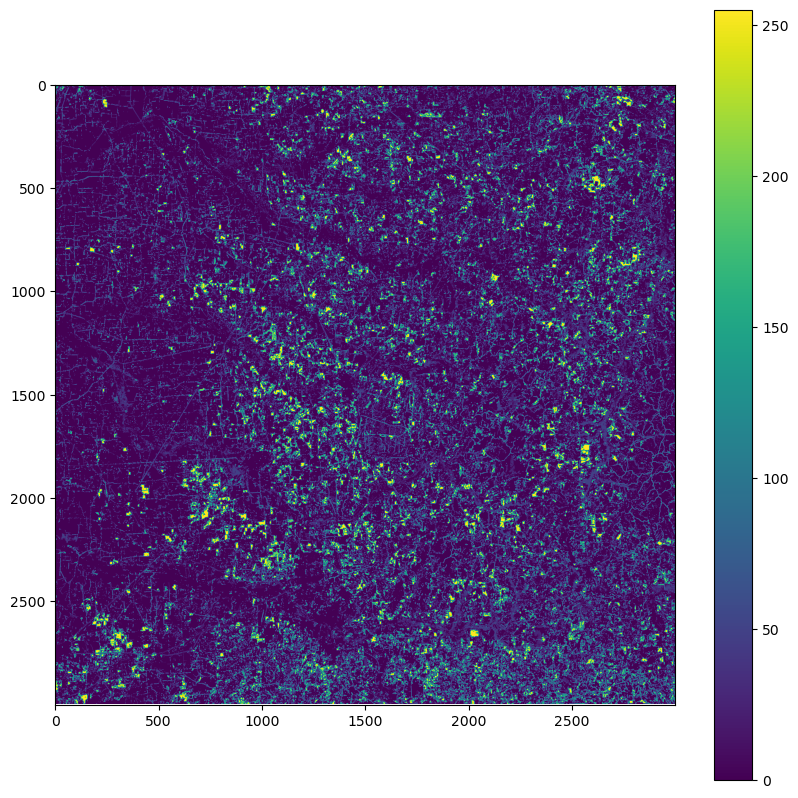

In [89]:
# Display difference

plt.figure(figsize=(10, 10))
plt.imshow(subset_diff)
plt.colorbar()

In [83]:
# Getting No Data Values (Seems not to be applicable to us)

# ndv = ds_2001.GetRasterBand(1).GetNoDataValue()
# print('No data value:', ndv)

## Use Pandas to visualize values

Convert the numpy array diff to a pandas Dataframe. This is a very common data science library. Will be useful to learn your way around it, useful to visualize how these values are changing.

In [95]:
# conda install pandas

import pandas as pd

In [117]:
df_2001 = pd.DataFrame(array_2001)
df_2004 = pd.DataFrame(array_2004)
df_diff = pd.DataFrame(diff)

In [120]:
df_2004.iloc[8000:8010,8000:8010]

,8000,8001,8002,8003,8004,8005,8006,8007,8008,8009
8000,21,82,81,81,82,82,82,82,82,82
8001,21,82,81,81,81,81,81,81,81,81
8002,21,82,81,81,81,81,81,81,81,81
8003,21,81,21,81,81,81,81,81,81,81
8004,81,81,81,81,81,81,81,81,81,81
8005,81,81,81,81,81,81,81,81,81,81
8006,81,81,81,43,81,43,81,81,81,81
8007,43,43,43,43,43,43,43,41,41,90
8008,41,43,43,41,41,43,43,43,90,41
8009,41,43,41,41,41,81,81,43,41,90


In [119]:
df_2001.iloc[8000:8010,8000:8010]

,8000,8001,8002,8003,8004,8005,8006,8007,8008,8009
8000,82,21,82,82,82,82,82,82,82,82
8001,82,21,82,82,82,21,21,82,82,82
8002,82,21,21,21,21,82,82,82,82,82
8003,82,21,82,21,82,82,82,82,82,82
8004,21,21,82,82,82,82,82,82,82,82
8005,21,82,82,82,82,82,82,82,82,82
8006,82,82,82,41,41,41,41,82,82,82
8007,41,41,41,41,41,41,41,41,90,90
8008,41,41,41,41,41,41,41,41,90,41
8009,41,41,41,41,41,81,81,41,41,90


In [121]:
df_diff.iloc[8000:8010,8000:8010]

,8000,8001,8002,8003,8004,8005,8006,8007,8008,8009
8000,195,61,255,255,0,0,0,0,0,0
8001,195,61,255,255,255,60,60,255,255,255
8002,195,61,60,60,60,255,255,255,255,255
8003,195,60,195,60,255,255,255,255,255,255
8004,60,60,255,255,255,255,255,255,255,255
8005,60,255,255,255,255,255,255,255,255,255
8006,255,255,255,2,40,2,40,255,255,255
8007,2,2,2,2,2,2,2,0,207,0
8008,0,2,2,0,0,2,2,2,0,0
8009,0,2,0,0,0,0,0,2,0,0


In [ ]:
# Convert to csv

# filepath = "./data/0104_diff.csv"
# df_diff.to_csv(filepath)  

## Testing GDAL Scripts

Now we will test some gdal scripts to compare tif files

In [55]:
# Imports (add more here if you need)

from osgeo_utils import gdalcompare

In [56]:
# Run to make sure GDAL is installed

!gdalinfo --version

GDAL 3.6.2, released 2023/01/02


In [82]:
# Run to test compare function

gdalcompare.compare_band(band_2001, band_2004, "1")

Band 1 checksum difference:
  Golden: 8980
  New:    38685
  Pixels Differing: 113972000
  Maximum Pixel Difference: 84.0
Band 1 overview 0 checksum difference:
  Golden: 6670
  New:    31130
  Pixels Differing: 28469020
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 0 checksum difference:
  Golden: 30613
  New:    22289
  Pixels Differing: 7127618
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 1 checksum difference:
  Golden: 10042
  New:    26895
  Pixels Differing: 1783728
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 2 checksum difference:
  Golden: 501
  New:    46457
  Pixels Differing: 445792
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 3 checksum difference:
  Golden: 15251
  New:    46906
  Pixels Differing: 111617
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 4 checksum difference:
  Golden: 53828
  New:    42208
  Pixels Differing: 27862
  Maximum Pixel Difference: 84.0
Band 1 overview 0 overview 5 checksum

17

In [ ]:
# Close rasters when you are done
# ds_2001 = None
# ds_2004 = None